In [17]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
from src.data.DataLoader import get_dataset

# zuerst files die ich brauche temporär downloaden oder direkt laden mittels library, dann hat man es lokal
#      und von dort aus richtigen Pfad nehmen
# get out_dir (ist in den runs in out_dir eingespeichert)
# dann files öffnen
# in pd dataframes laden: pd.read_csv(out_dir + "/file")
# dann mit plot aus tutorial anzeigen lassenfrom

sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
#data_handler, d_args = get_handler_and_args("CIFAR10")
# S: Das sind die Roh-Daten, die (bzw. X_tr) müssen mit PCA oder Tsne transformiert werden.
# Dann werden diese Daten im zweidimensionalen Raum geplottet
X_tr, Y_tr, X_te, Y_te = get_dataset("CIFAR10")
rng = np.random.RandomState(0)
colors = rng.rand(10)
colors
len(Y_tr)

Files already downloaded and verified
Files already downloaded and verified


50000

In [18]:
Y_tr

tensor([6, 9, 9,  ..., 9, 1, 1])

In [19]:
path = '52cb83fe7df64b5baf369ee172b4194b'
# S: das sind die die selektiert wurden, die müssen gehighlighted werden
sampled_data = pd.read_csv("/Users/ilijanaspasojevic/PycharmProjects/dmbal/src/remote_files/" + "/1_statistics.csv")
sampled_data
budget_data = pd.read_csv("/Users/ilijanaspasojevic/PycharmProjects/dmbal/src/remote_files/" + "/1_budget.csv")
budget_data

,Unnamed: 0,idx,centroid
0,0,6508,1
1,1,45653,0
2,2,26132,0
3,3,20348,0
4,4,3234,3
...,...,...,...
9995,9995,7226,0
9996,9996,29211,0
9997,9997,9172,5
9998,9998,24612,5


In [20]:
def label_scatter(data_points, sampled, labels):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(labels))
    print(num_classes)
    palette = np.array(sns.color_palette("hls", num_classes))
    print(palette)

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    #c=palette[labels.astype(np.int)
    weights_datapoints = np.arange(1, 11)
    weights_sampled = np.arange(1, len(sampled)+1)
    #c=label, cmap=matplotlib.colors.ListedColormap(colors)
    sc_data_points = ax.scatter(data_points[:,0], data_points[:,1], lw=0, s=40, c=labels, cmap='Greys')
    sc_sampled = ax.scatter(sampled[:,0], sampled[:,1], lw=0, s=40, c='red')
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

#    for i in range(num_classes):

        # Position of each label at median of data points.

#        xtext, ytext = np.median(x[labels == i, :], axis=0)
#        txt = ax.text(xtext, ytext, str(i), fontsize=24)
#        txt.set_path_effects([
#            PathEffects.Stroke(linewidth=5, foreground="w"),
#            PathEffects.Normal()])
#        txts.append(txt)

    #return f, ax, sc_data_points, sc_sampled, txts


In [21]:
from sklearn.decomposition import PCA

time_start = time.time()

pca = PCA()
# S: hier vermutlich:
budget_tr = X_tr[budget_data['idx']]
x = budget_tr.reshape(budget_tr.shape[0], -1)
print(x)

[[121 136 219 ...  77  81 111]
 [ 78  69  65 ... 252 252 248]
 [  8   4   1 ...  37  31  31]
 ...
 [230 231 228 ...  62  57  57]
 [232 221 185 ... 222 195 115]
 [220 224 223 ...  83  74  51]]


In [22]:
X_tr[sampled_data['img_id']]

array([[[[ 32,  33,  27],
         [ 32,  33,  28],
         [ 36,  37,  32],
         ...,
         [167, 156, 140],
         [166, 159, 142],
         [166, 159, 142]],

        [[ 34,  35,  29],
         [ 36,  37,  33],
         [ 35,  35,  32],
         ...,
         [171, 162, 145],
         [168, 156, 140],
         [168, 155, 139]],

        [[ 36,  37,  33],
         [ 36,  37,  34],
         [ 27,  28,  26],
         ...,
         [109, 115, 104],
         [142, 141, 127],
         [167, 155, 137]],

        ...,

        [[180, 168, 147],
         [174, 161, 141],
         [165, 156, 136],
         ...,
         [ 92,  75,  48],
         [ 95,  80,  56],
         [ 40,  37,  31]],

        [[182, 169, 150],
         [182, 169, 148],
         [148, 146, 131],
         ...,
         [ 88,  72,  47],
         [ 69,  59,  44],
         [ 15,  15,  13]],

        [[177, 165, 147],
         [185, 171, 151],
         [129, 132, 118],
         ...,
         [ 61,  51,  38],
        

In [23]:
print(len(x))

10000


In [24]:
#sampled_data['img_id']
Sampled = X_tr[sampled_data['img_id']]
sampled = Sampled.reshape(Sampled.shape[0], -1)

In [25]:
pca_result_data_points = pca.fit_transform(x)
#pca_result_sampled = pca.fit_transform(sampled_data)
print(pca_result_data_points)

[[ 1.96125867e+03 -1.81655669e+02  2.55477733e+03 ... -2.61304789e-01
  -1.33481071e-01  1.11878045e-01]
 [ 2.00043858e+03  2.84607709e+03 -2.03822188e+03 ...  1.26727745e-01
   1.07644059e-01 -2.42166659e-01]
 [-2.88799120e+03 -1.26549760e+03  1.15562048e+02 ...  3.31035339e-02
  -5.31971367e-01 -3.53597361e-02]
 ...
 [ 4.55749771e+03 -5.84795300e+02  1.20348139e+03 ... -2.70915643e-01
   2.40205529e-02 -1.21063412e-01]
 [ 3.13943286e+03 -1.37435745e+02 -2.10136521e+03 ... -2.50588663e-02
   2.45430651e-01 -1.85934698e-02]
 [ 1.14534164e+03 -2.00025815e+03 -8.65063911e+01 ...  1.30258634e-01
   2.72891200e-01  1.91188481e-01]]


In [26]:
pca_result_sampled = pca.fit_transform(sampled)

In [27]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result_data_points[:,0]
pca_df['pca2'] = pca_result_data_points[:,1]
top_two_comp = pca_df[['pca1','pca2']]
print(top_two_comp)

             pca1         pca2
0     1961.258675  -181.655669
1     2000.438577  2846.077095
2    -2887.991201 -1265.497596
3     5220.010403  1891.021853
4      238.271220 -2756.026670
...           ...          ...
9995 -4512.932388  -798.086999
9996 -2253.410869  -998.588715
9997  4557.497709  -584.795300
9998  3139.432857  -137.435745
9999  1145.341636 -2000.258152

[10000 rows x 2 columns]


In [28]:
pca_df_sampled = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df_sampled['pca1'] = pca_result_sampled[:,0]
pca_df_sampled['pca2'] = pca_result_sampled[:,1]
top_two_comp_sampled = pca_df_sampled[['pca1','pca2']]
print(top_two_comp_sampled)

            pca1         pca2
0     627.931871 -1281.272318
1    1995.076363  1439.905912
2   -2254.793392  -441.792482
3     -68.545981  1167.272764
4   -2477.156700   733.628036
..           ...          ...
995   -34.024461  1056.776683
996 -2097.740938   129.678951
997 -4498.904461  -736.310083
998 -3119.407254    25.353894
999 -1865.688247   593.364387

[1000 rows x 2 columns]


In [30]:
budget_data['centroid']

0       1
1       0
2       0
3       0
4       3
       ..
9995    0
9996    0
9997    5
9998    5
9999    3
Name: centroid, Length: 10000, dtype: int64

10
[[0.86   0.3712 0.34  ]
 [0.86   0.6832 0.34  ]
 [0.7248 0.86   0.34  ]
 [0.4128 0.86   0.34  ]
 [0.34   0.86   0.5792]
 [0.34   0.8288 0.86  ]
 [0.34   0.5168 0.86  ]
 [0.4752 0.34   0.86  ]
 [0.7872 0.34   0.86  ]
 [0.86   0.34   0.6208]]


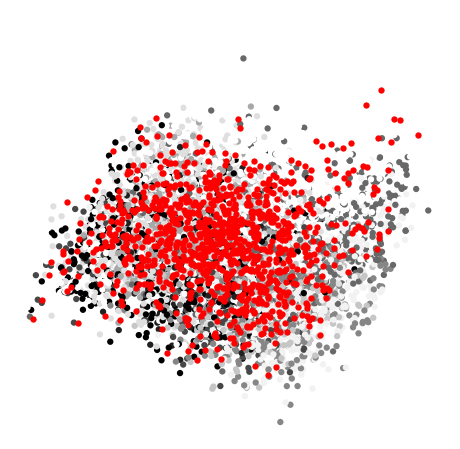

In [31]:
label_scatter(top_two_comp.values, top_two_comp_sampled.values, budget_data['centroid'])